In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier

In [2]:
crypto_df = pd.read_csv(Path('Resources/crypto_data.csv'))

In [3]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
# Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [5]:
# Filter for currencies that are currently being traded
crypto_df.drop(crypto_df[crypto_df['IsTrading'] == False].index, inplace=True)

In [6]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,41.99995,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1055184902.04000,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.00000,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,980222595.00000,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7296537.50000,21000000


In [7]:
# Drop CoinName and IsTrading columns
crypto_df2 = crypto_df.drop(['IsTrading', 'CoinName'], axis=1)

In [8]:
# Drop all rows that have at least one null value
crypto_df2.dropna()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,41.99995,42
2,404,Scrypt,PoW/PoS,1055184902.04000,532000000
4,808,SHA-256,PoW/PoS,0.00000,0
5,1337,X13,PoW/PoS,29279424622.50270,314159265359
7,BTC,SHA-256,PoW,17927175.00000,21000000
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,1999999995.30560,2000000000
1242,GAP,Scrypt,PoW/PoS,14931046.15466,250000000
1245,BDX,CryptoNight,PoW,980222595.00000,1400222610
1246,ZEN,Equihash,PoW,7296537.50000,21000000


In [9]:
# Filter for cryptocurrencies that have been mined
crypto_df3 = crypto_df2[crypto_df2['TotalCoinsMined'] > 0] 
crypto_df3


,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,41.99995,42
2,404,Scrypt,PoW/PoS,1055184902.04000,532000000
5,1337,X13,PoW/PoS,29279424622.50270,314159265359
7,BTC,SHA-256,PoW,17927175.00000,21000000
8,ETH,Ethash,PoW,107684222.68650,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,1999999995.30560,2000000000
1242,GAP,Scrypt,PoW/PoS,14931046.15466,250000000
1245,BDX,CryptoNight,PoW,980222595.00000,1400222610
1246,ZEN,Equihash,PoW,7296537.50000,21000000


In [11]:
#Convert features columns to numerical
crypto_dummies = pd.get_dummies(crypto_df3, columns = ['Unnamed: 0','Algorithm', 'ProofType'])

In [12]:
crypto_dummies

,TotalCoinsMined,TotalCoinSupply,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,41.99995,42,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1055184902.04000,532000000,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,29279424622.50270,314159265359,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,17927175.00000,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,107684222.68650,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1999999995.30560,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,14931046.15466,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,980222595.00000,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7296537.50000,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Standardize the data

crypto_scaled = StandardScaler().fit_transform(crypto_dummies)
print(crypto_scaled[0:5])


[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 23.04343724 ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11671506 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11474682 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


In [15]:
# Initialize PCA model
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)

# Get principal components for the crypto data.
crypto_pca = pca.fit_transform(crypto_scaled)

In [17]:
# Transform PCA data to a DataFrame to determine how the number of features changed
df_crypto_pca = pd.DataFrame(
    data=crypto_pca
)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,459,460,461,462,463,464,465,466,467,468
0,-0.39165,1.25458,-0.72306,0.00171,0.00000,0.00000,-0.00000,-0.00873,-1.64119,-0.06517,...,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000
1,-0.37217,1.25475,-0.72357,0.00170,0.00000,0.00000,-0.00000,-0.00948,-1.64462,-0.07129,...,1.53074,-0.38801,-0.26688,-0.39444,0.00891,-0.17103,0.20525,0.02665,-0.85972,-5.07847
2,2.69455,2.01325,-0.83678,0.00579,0.00000,0.00000,-0.00000,-0.06710,-1.91866,-1.18731,...,-1.00714,-1.90020,-1.73071,-0.63046,-1.14981,-1.94782,0.98595,0.29993,-3.43128,-2.34922
3,-0.16969,-1.60512,0.23601,-0.00150,-0.00000,-0.00000,0.00000,-0.00254,0.35001,0.31679,...,0.22029,-0.13220,-0.20672,-0.05519,0.70939,0.54634,1.57612,-2.86866,-1.58473,-0.39817
4,-0.17738,-2.47489,0.48495,-0.00209,-0.00000,-0.00000,0.00000,0.03397,0.64553,0.23750,...,-0.60102,2.03226,-0.89414,-0.17865,-0.48257,-3.49379,0.17827,-1.82905,2.14548,-0.08940


In [ ]:
# Number of columns reduced from 630 to 469

In [19]:
# Initialize t-SNE model
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=250)

In [20]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_crypto_pca)

In [21]:
tsne_features.shape

(532, 2)

In [22]:
# Prepare to plot the dataset

# The first column of transformed features
df_crypto_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_crypto_pca['y'] = tsne_features[:,1]

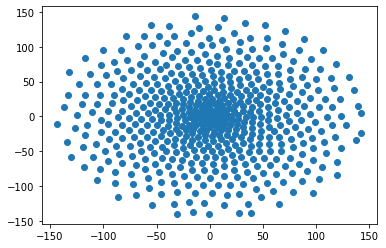

In [24]:
# Visualize the clusters
import matplotlib.pyplot as plt

plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.show()

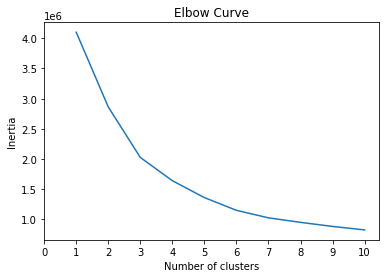

In [26]:
# Finding the best value for k
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()